<img src="Secondary-logo-Bright.png"  alt="Pneumonia"
     title="Pneumonia"/>

# <span style='color:#2E8BC0'> Dataset </span> 

#### The dataset we have is splitted into:
     - train set
     - test set
     - val set 
#### The classes are:
    - normal images 
    - Tuberculosis  images

# <span style='color:#2E8BC0'>Import Initial Libraries </span> 

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import tensorflow as tf
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg

# <span style='color:#2E8BC0'> Collect Info About Data </span> 

In [3]:
# ==> Get The Num of normal images and num of virus images ==> 1 step ==> train file

num_normal = os.listdir(r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\train\NORMAL")
num_covid = os.listdir(r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\train\TURBERCULOSIS") 
train_images = {"TURBERCULOSIS" : len(num_covid) ,
              "Normal" :len(num_normal)
             } 

In [4]:
train_images

{'TURBERCULOSIS': 650, 'Normal': 1341}

In [5]:
# ==> Get The Num of normal images and num of virus images ==> 2 step ==> test file
num_normal = os.listdir(r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\test\NORMAL")
num_covid = os.listdir(r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\test\TURBERCULOSIS") 
test_images = {"TURBERCULOSIS" : len(num_covid) ,
              "Normal" :len(num_normal)
             }

In [6]:
test_images

{'TURBERCULOSIS': 103, 'Normal': 234}

In [7]:
# ==>  Get The Num of normal images and num of virus images ==> 3 step ==> val file
num_normal = os.listdir(r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\val\NORMAL") 
num_covid = os.listdir(r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\val\TURBERCULOSIS")
validation_images = {"TURBERCULOSIS" : len(num_covid) ,
              "Normal" :len(num_normal)
             } 

In [8]:
validation_images

{'TURBERCULOSIS': 8, 'Normal': 8}

# <span style='color:#2E8BC0'> Show data distribution  </span> 

<BarContainer object of 2 artists>

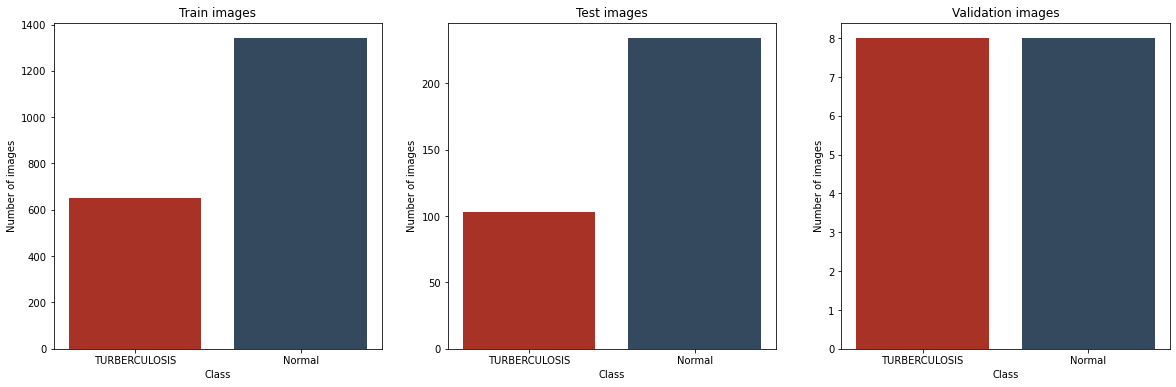

In [9]:
plt.figure(figsize=(20,6))

# show the train images (1)
plt.subplot(1,3,1)
plt.title("Train images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=train_images.keys(),height=train_images.values(),color=["#A93226","#34495E"])

# show the test images (2)
plt.subplot(1,3,2)
plt.title("Test images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=test_images.keys(),height=test_images.values(),color=["#A93226","#34495E"])

# show the validation images (3)
plt.subplot(1,3,3)
plt.title("Validation images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=validation_images.keys(),height=validation_images.values(),color=["#A93226","#34495E"])

#  <span style='color:#2E8BC0'>re-size all the Images</span> 

In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
# Default batch size
BATCH_SIZE = 32

#  <span style='color:#2E8BC0'> Show some images from the data  </span> 

In [11]:
# ==> Make Train Data pipline to collect all data in train in one stream
train_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\train",  # ==> Path train File
  seed=123,
  image_size=(256, 256), # ==>  the image output size 
  batch_size=32, 
  shuffle=True # ==> to shuffle the images when feeded to the model
)

Found 1991 files belonging to 2 classes.


In [12]:
# ==> Make Train Data pipline to collect all data in train in one stream
test_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\test",  # ==> Path train File
  seed=123,
  image_size=(256, 256), # ==>  the image output size 
  batch_size=32, 
  shuffle=True # ==> to shuffle the images when feeded to the model
)

Found 337 files belonging to 2 classes.


In [13]:
# ==> get the classes names form the data train
classes=train_ds.class_names 
classes  

['NORMAL', 'TURBERCULOSIS']

In [14]:
# ==> get the classes names form the data train
classes=test_ds.class_names 
classes  

['NORMAL', 'TURBERCULOSIS']

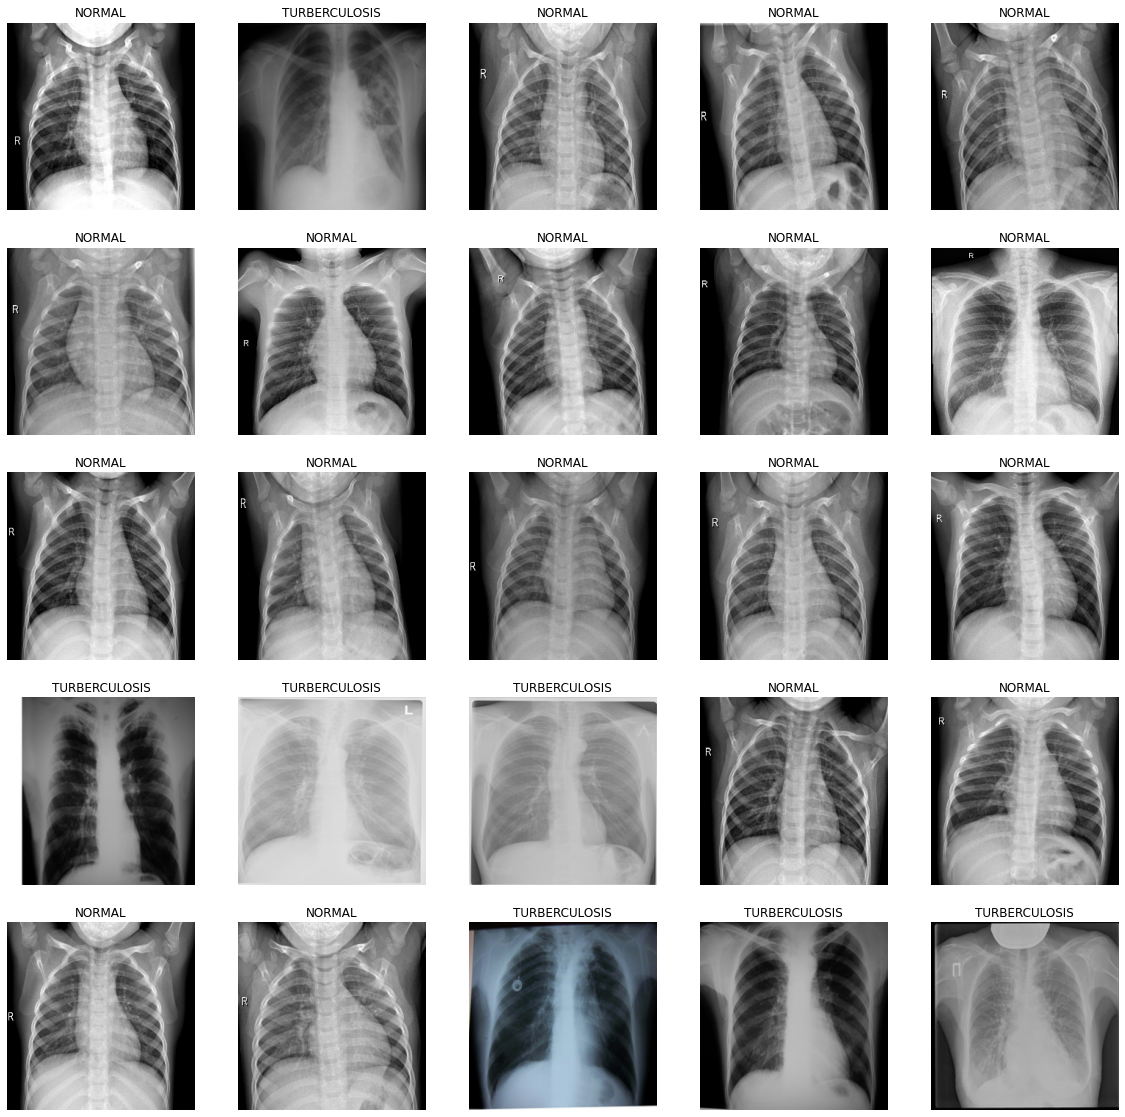

In [15]:
# ==> show 24 images from the data
plt.figure(figsize=(20,20))
for images, labels in train_ds.take(1) :
    # create a grid of 5x5 images
    for i in range(0,25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("u8"))
        plt.title(classes[labels[i]])
        plt.axis('off')
    # show the plot
    plt.show()
    break

#  <span style='color:#2E8BC0'> Flow from directory</span> 


In [16]:
train_path = r'C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\train'
test_path = r'C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\test'
valid_path = r'C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\val'

In [17]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1991 images belonging to 2 classes.
Found 337 images belonging to 2 classes.


#  <span style='color:#2E8BC0'>Build Model and Show Model Architecture(VGG16)</span>

In [19]:
# ==>  using imagenet weights
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
for layer in vgg.layers:
    layer.trainable = False
folders = glob(r"C:\Users\lenovo\Desktop\Project\Tuberculosis Project\chest_xray\train\*") # ==>getting number of output classes
x = Flatten()(vgg.output) # ==> add more of layers
detection = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=detection) # ==> # model object craetion to usage

#  <span style='color:#2E8BC0'> Model Architecture(VGG16)</span> 

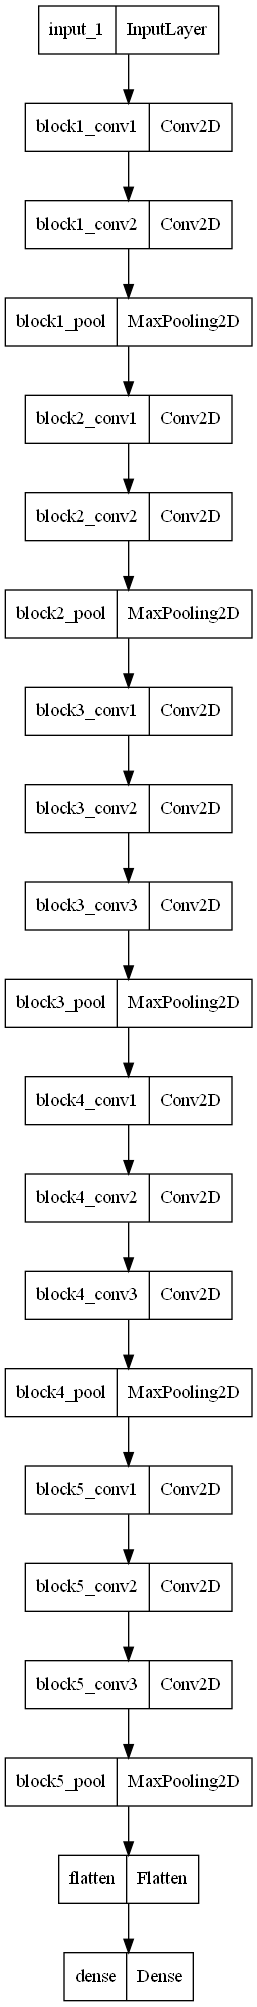

In [21]:
# ==> Show the architecture of Technique
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg16.png')

#  <span style='color:#2E8BC0'>Model Structure</span>

In [21]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
# ==> optimization method 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
# ==> fit method to fitting the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
63/63 [==============================] - 179s 3s/step - loss: 0.0580 - accuracy: 0.9714 - val_loss: 0.0228 - val_accuracy: 0.9911
Epoch 2/5
63/63 [==============================] - 182s 3s/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0384 - val_accuracy: 0.9792
Epoch 3/5
63/63 [==============================] - 182s 3s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9763
Epoch 4/5
63/63 [==============================] - 182s 3s/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0169 - val_accuracy: 0.9941
Epoch 5/5
63/63 [==============================] - 181s 3s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9881


In [24]:
# ==> Evaluating the model on train and test
score = model.evaluate(training_set)
# ==> 1) train
print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])
# ==> 1) test
score = model.evaluate(test_set)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

63/63 [==============================] - 154s 2s/step - loss: 0.0021 - accuracy: 1.0000
Train Loss:  0.0020611498039215803
Train Accuracy:  1.0
11/11 [==============================] - 26s 2s/step - loss: 0.0296 - accuracy: 0.9881

Test loss:  0.02961738035082817
Test Accuracy:  0.9881305694580078


#  <span style='color:#2E8BC0'>Loss & Accuracy</span> 

Text(0.5, 1.0, 'Accuraccy Curve')

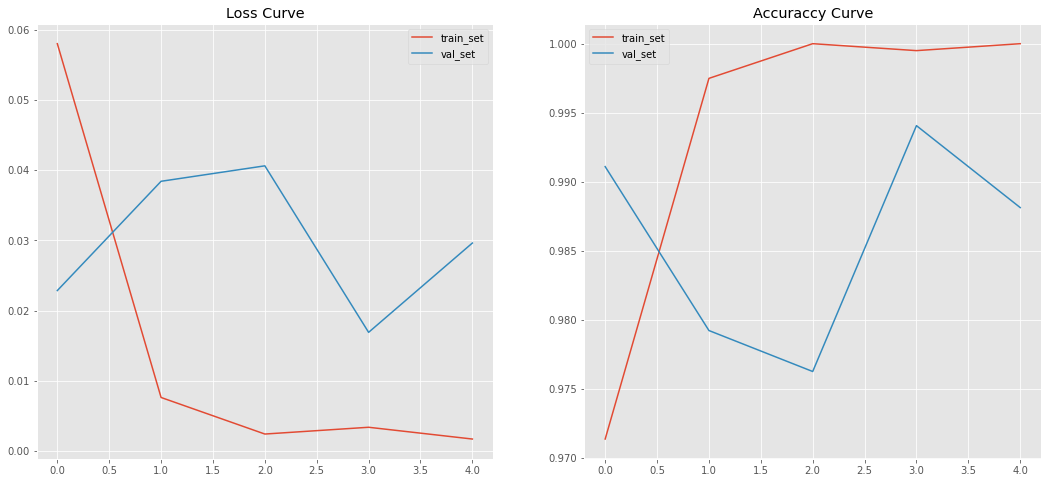

In [25]:
plt.style.use("ggplot")
plt.figure(figsize=(18, 8))
# the loss curve
plt.subplot(1, 2, 1)
plt.plot(r.history['loss'], label='train_set')
plt.plot(r.history['val_loss'], label='val_set')
plt.legend()
plt.title('Loss Curve')
# the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(r.history['accuracy'], label='train_set')
plt.plot(r.history['val_accuracy'], label='val_set')
plt.legend()
plt.title('Accuraccy Curve')